### <span style="color:#A28C15; font-size:2.5em;"> 📊 Bank Marketing Campaign Analysis and Prediction </span>


# 📊 **Term Deposit Subscription - Client Behavior Analysis Project**

## 📝 **Project Overview**
In the world of modern banking, where customers have access to endless financial products, understanding client behavior is crucial. This dataset encapsulates the story of a bank’s direct marketing campaign, where personalized outreach to clients aims to promote term deposits. The challenge lies in identifying which clients are most likely to subscribe.

### ***What is a Term Deposit?***

A Term deposit is a deposit that a bank or a financial institurion offers with a fixed rate (often better than just opening deposit account) in which your money will be returned back at a specific maturity time

## ***Background and Context:***
This dataset contains data collected from direct marketing campaigns of a Portuguese bank. These campaigns aim to promote term deposits by contacting clients through phone calls.
## ***Problem Statement:***
The key problem is to predict whether ***a client will subscribe to a term deposit*** based on their profile and campaign details, enabling the bank to optimize its campaign resources and target potential customers effectively.

## Goal of the Project
## **Main Objective:** 
Develop a machine learning model to predict client subscription based on demographic, financial, and campaign-related features.

## **Evaluation Metrics:**
- Accuracy
- Precision
- Recall
- F1-score
- ROC-AUC

- s.
***Dataset Size***: 45,211 rows, 17 features (16 features + 1 Target Label
  
  ).
***Outcome***: Build models to identify key client segments and improve campaign efficiency.

## 📈 **Dataset Description**

This is the classic marketing bank dataset uploaded originally in the UCI Machine Learning Repository. The dataset gives you information about a marketing campaign of a financial institution in which you will have to analyze in order to find ways to look for future strategies in order to improve future marketing campaigns for the bank.

The dataset comprises ***45,211 rows and 17 columns*** of client information, campaign details, and the final outco of whether they subscribed to a term deposit (y)me.Each row in the dataset tells the story of a client interaction. Whether it's the duration of a call, the timing of the campaign, or the client’s financial profile, every feature offers a clue about what works and what doesn’t in engaging clients.
- **Client Demographics**
- **Financial Profile**
- **Campaign Details**
- **Target Variable**

This allows fo
This allows for a comprehensive analysis of factors influencing subscription decisions.

--------------------------------------------------------------------------n.


<h2 style="color: Blue; font-family: Arial; font-weight: bold;">Importing Packages</h2>



In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

<h2 style="color: Blue; font-family: Arial; font-weight: bold;">Importing file<h4>(as csv)</h4></h2>

In [113]:

# Load the dataset with ';' as the delimiter
data = pd.read_csv('bank-full.csv', delimiter=';', quotechar='"')


In [115]:
df=pd.DataFrame(data)

| No. | Attribute     |   Data type     |   Description                                    |  Demographic   |                          
|:---:|:--------------|:----------------|:------------------------------------------------|:----------------|
|  1  | age           | Numeric/Integer |                                                 |Age  |
|  2  | job           | Categorical     | type of job (categorical: 'admin.','blue collar','entrepreneur','housemaid','management', 'retired','self-employed','services','student','technician','unemployed','unknown')     | Occupation   |        
|  3  |marital        | Categorical	    | marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)    |Marital Status  |
|  4  |education      | Categorical	    |(categorical:'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')	  | Education Level  |
|  5  |default        | Binary		    | has credit in default?                          |    |
|  6  | balance       | Integer		    | average yearly balance                          |    |
|  7  | housing       |Binary		    | has housing loan?                               |    |
|  8  | loan          | Binary		    | has personal loan?                              |    |
|  9  | contact       | Categorical		| contact communication type(categorical: 'cellular','telephone')   |    |
| 10  | day_of_week   | Date		    | last contact day of the week                    |    |
| 11  | month         | Date		    | last contact month of year(categorical:'jan','feb','mar', ...,'nov','dec') |    |
| 12  | duration       |Integer	|	last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.  |    |
| 13  | campaign	        | Integer|		number of contacts performed during this campaign and for this client (numeric, includes last contact)|    |
| 14  | pdays	        | Integer	|	number of days that passed by after the client was last contacted from a previous campaign (numeric; -1 means client was not previously contacted)|    |
| 15  |previous	        | Integer	|	number of contacts performed before this campaign and for this client|    |
| 16  | poutcome	        |Categorical|		outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')|    |
| 17  |Label - y (term_deposit) | object |	 has the client subscribed a term deposit? (binary: 'yes','no')?|    |


# <font color="#4863A0" size="5"> Initial Information About The Dataset 🧪</font>
This comment signifies that we are going to display initial information of the dataset to get a glimpse of the data's structure and values.
- Displaying the first few rows of the dataset to get a glimpse of the data.
- Checking the shape of the dataset (number of rows and columns).
- Exploring the column names and data types.
- Descriptive Statistics includes:
    - Numeric Variables.
    - Categorical Variables.

In [87]:
# Display the first few rows to confirm the structure
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## ***Insights Explanation***
The dataset provides insights into how client demographics and past campaign interactions influence subscription decisions.

**Features such as age, job, balance, and duration are critical for understanding client behavior.**

In [14]:
# Show the shape of the dataset
print("The shape =", df.shape)

# Dataset dimensions and statistics
num_rows, num_cols = df.shape
num_features = num_cols - 1
num_data = num_rows * num_cols

# Print the information about the dataset
print(f"Number of Rows: {num_rows}")
print(f"Number of Columns: {num_cols}")
print(f"Number of Features: {num_features}")
print(f"Number of All Data: {num_data}")
categorical_features=[feature for feature in df.columns if ((df[feature].dtypes=='O') & (feature not in ['y']))]
categorical_features

The shape = (45211, 17)
Number of Rows: 45211
Number of Columns: 17
Number of Features: 16
Number of All Data: 768587


['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

## Insights from Dataset Overview:

- **Total Entries**: 45,211
- **Total Columns**: 17
- **Data Types**: 
  - Integer (7 columns)
  - Object (10 columns)
- Numerical columns: age, balance, day, duration, campaign, pdays, previous

- Categorical columns: job, marital, education, default, housing, loan, contact, month, poutcome, y

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [17]:
for col in df.select_dtypes(include='object').columns:
    print(col)
    print(df[col].unique())

job
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital
['married' 'single' 'divorced']
education
['tertiary' 'secondary' 'unknown' 'primary']
default
['no' 'yes']
housing
['yes' 'no']
loan
['no' 'yes']
contact
['unknown' 'cellular' 'telephone']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome
['unknown' 'failure' 'other' 'success']
y
['no' 'yes']


In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0



## ***Key Observations from Summary Statistics:***

The average **age** of clients is around 41 years, with the youngest being 18 and the oldest 95.

The **balance** column shows a wide range, from -8019 to 102,127, indicating potential outliers.

Many **pdays** values are -1, suggesting clients who were not previously contacted.

**duration** has a minimum of 0, possibly indicating calls that were not answered.

In [20]:
df.describe(include=object).T

,count,unique,top,freq
job,45211,12,blue-collar,9732
marital,45211,3,married,27214
education,45211,4,secondary,23202
default,45211,2,no,44396
housing,45211,2,yes,25130
loan,45211,2,no,37967
contact,45211,3,cellular,29285
month,45211,12,may,13766
poutcome,45211,4,unknown,36959
y,45211,2,no,39922


In [21]:
# Check for missing values
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

### Explanation:
This step ensures there are no missing values in the dataset. If any exist, appropriate imputation strategies will be applied.

In [23]:
# Check for duplicates
print(f"Number of duplicate rows: {df.duplicated().sum()}")

Number of duplicate rows: 0


# <font color="#686868" size="5"> 🔍 Data Exploration(EDA) </font>

Exploratory Data Analysis (EDA), is an essential step in the machine learning pipeline. It involves **examining** and **visualizing the characteristics of a dataset to gain insights**, **understand patterns**, **detect anomalies**, and **prepare the data for further analysis** and **modeling**. some common techniques used in data exploration:
- Data Visualization
- Data Cleaning
- Data Preprocessing

# <font color="#4863A0" size="5"> Data Visualization

Creating visual representations such as **histograms**,**scatter plots**, **box plots**, and **heatmaps** to explore the distribution, relationships, and trends within the dataset. Visualization aids in identifying **patterns**, **correlations**, and **potential insights** that may not be apparent from just looking at the raw data. there are some ways to discover it:
- Graphical Analysis
    - Bar Charts
    - Pie Charts 
    - Histograms
- Correlation Analysis
- Data Relationships Analysis

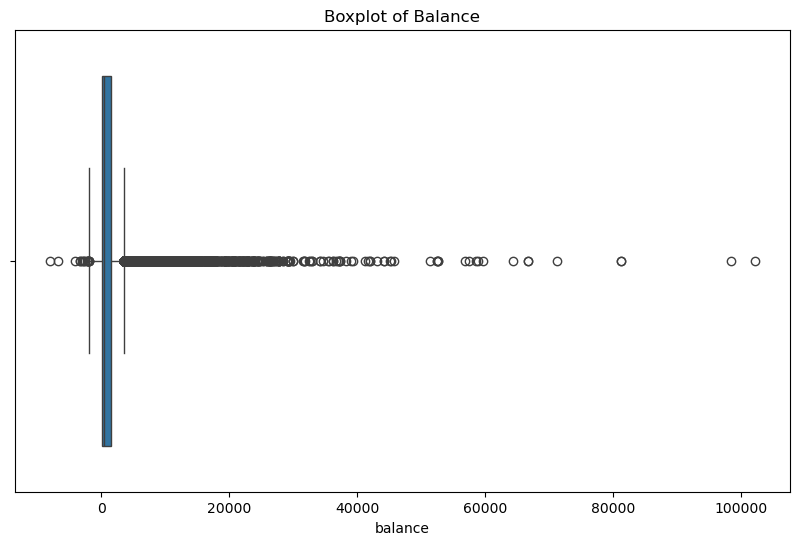

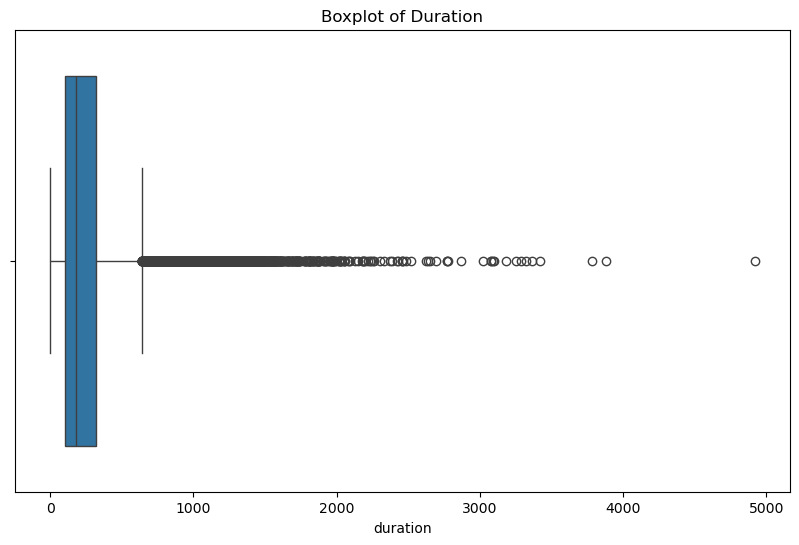

In [26]:
# Visualize outliers in 'balance'
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['balance'])
plt.title('Boxplot of Balance')
plt.show()

# Visualize outliers in 'duration'
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['duration'])
plt.title('Boxplot of Duration')
plt.show()


In [27]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is job and number of categories are 12
The feature is marital and number of categories are 3
The feature is education and number of categories are 4
The feature is default and number of categories are 2
The feature is housing and number of categories are 2
The feature is loan and number of categories are 2
The feature is contact and number of categories are 3
The feature is month and number of categories are 12
The feature is poutcome and number of categories are 4


**Take-away:**


there are 9 categorical features
featsure job and month has highest number of categorical valuss.

### Categorical Feature Distribution ###

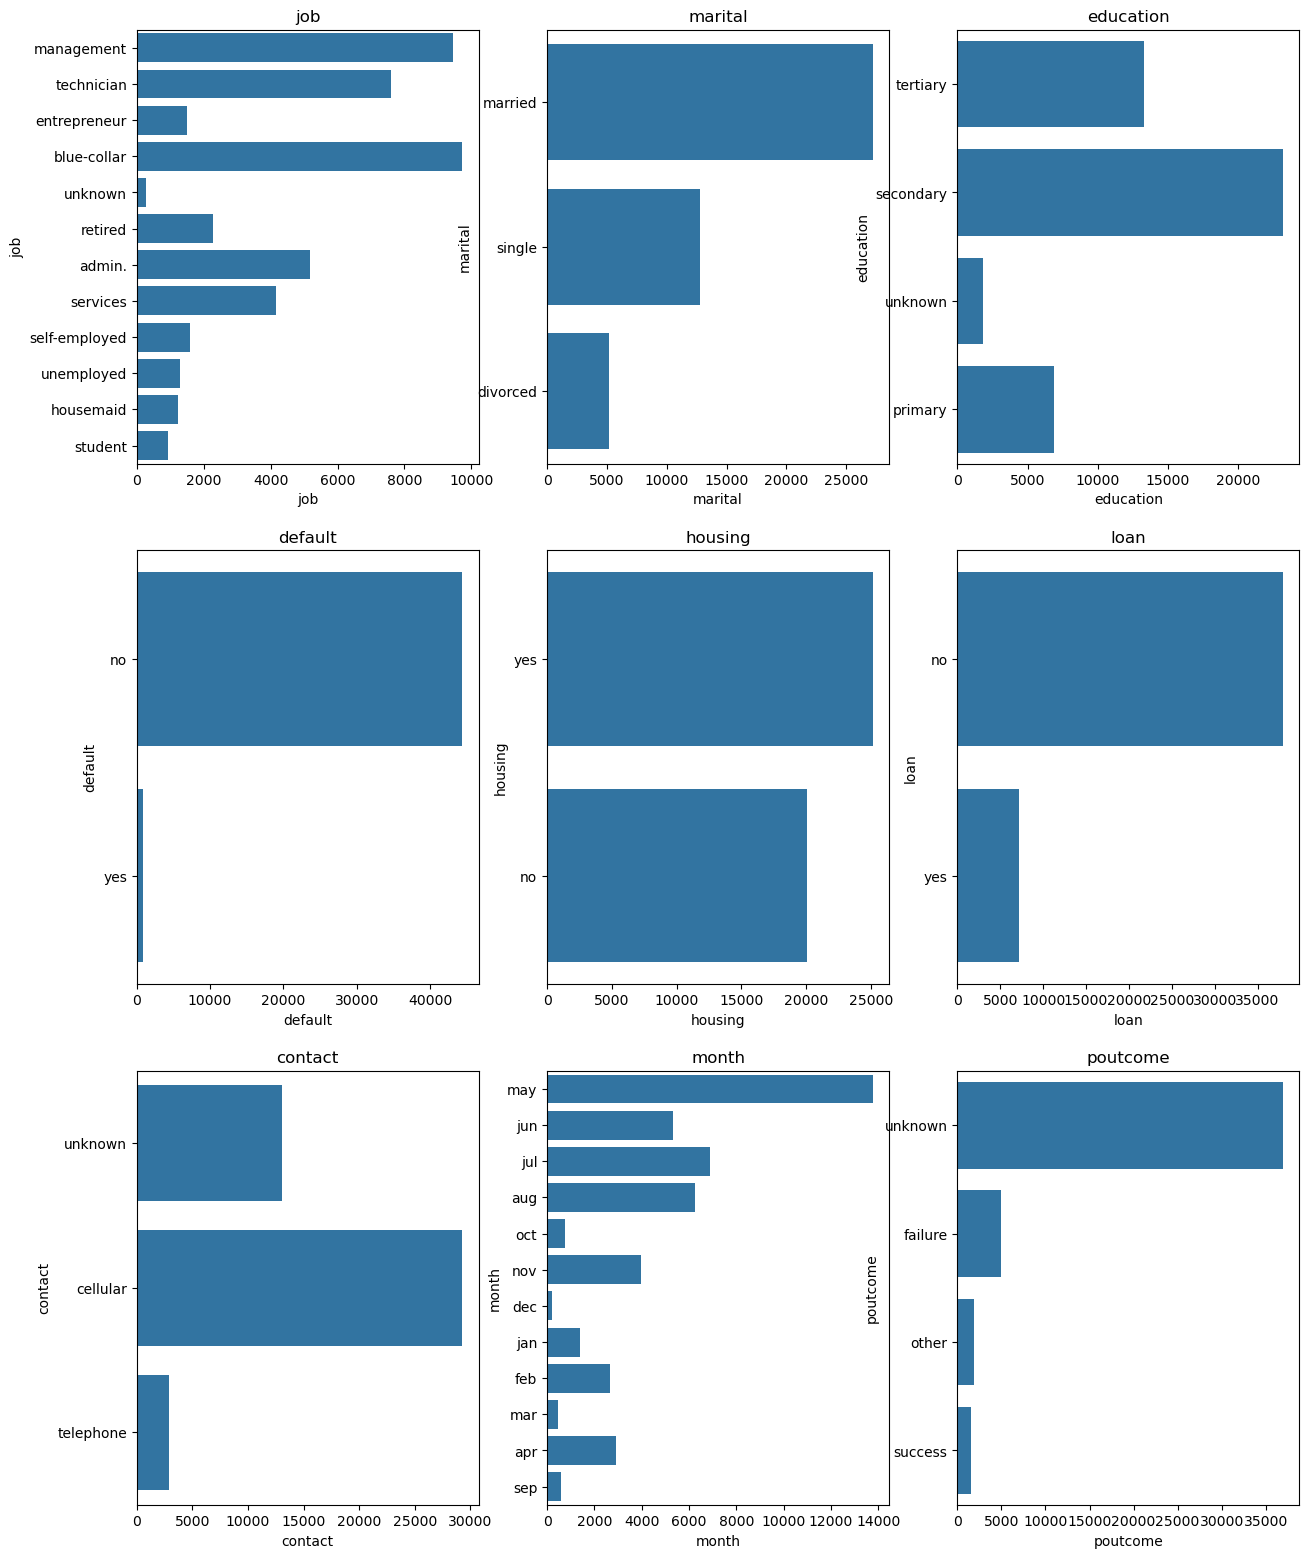

In [30]:
#check count based on categorical features
plt.figure(figsize=(15,80), facecolor='white')
plotnumber =1
for categorical_feature in categorical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=categorical_feature,data=df)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1
plt.show()

**Take-away:**

- client with job type as management records are high in given dataset and housemaid are very less
- client who married are high in records in given dataset and divorced are less
- client whoes education background is secondary are in high numbers in given dataset
- defualt feature seems to be does not play importand role as it has value of no at high ratio to value yes which can drop
- data in month of may is high and less in dec

### Relationship between Categorical Features and Label

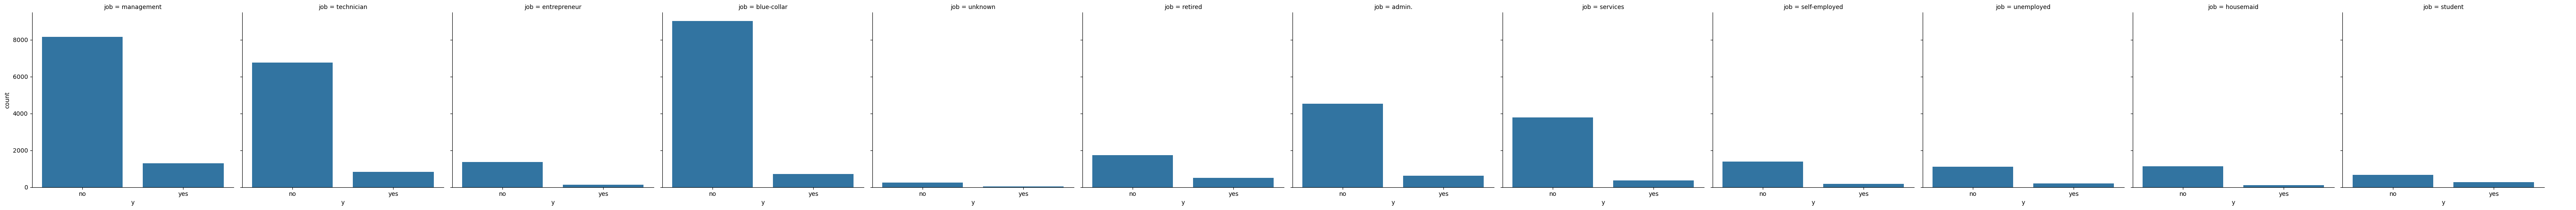

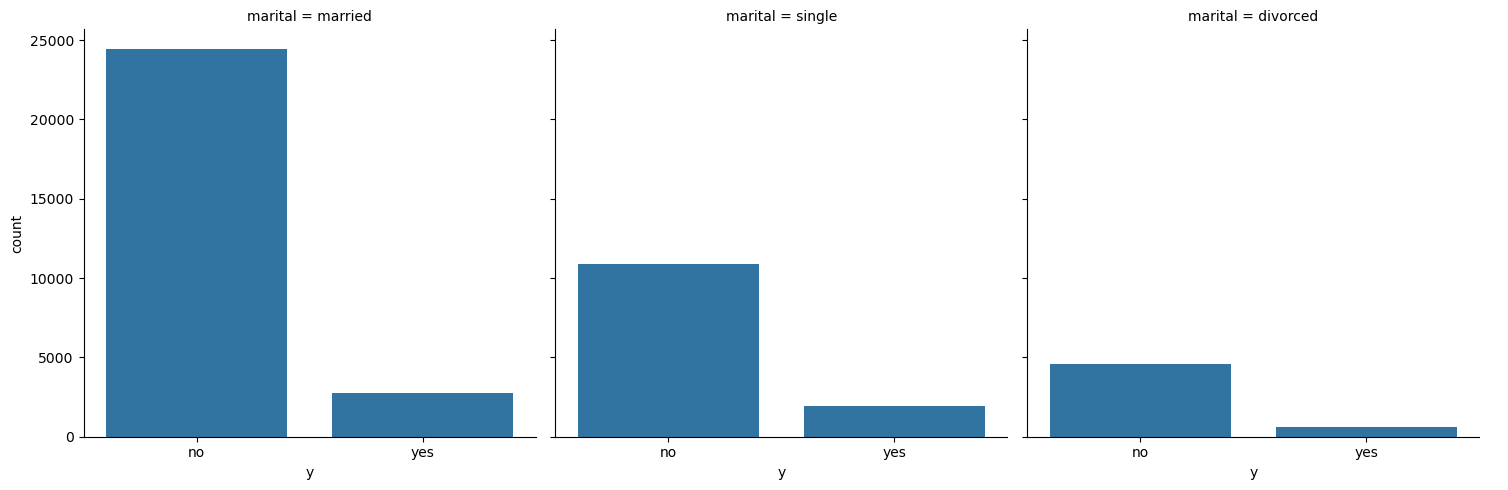

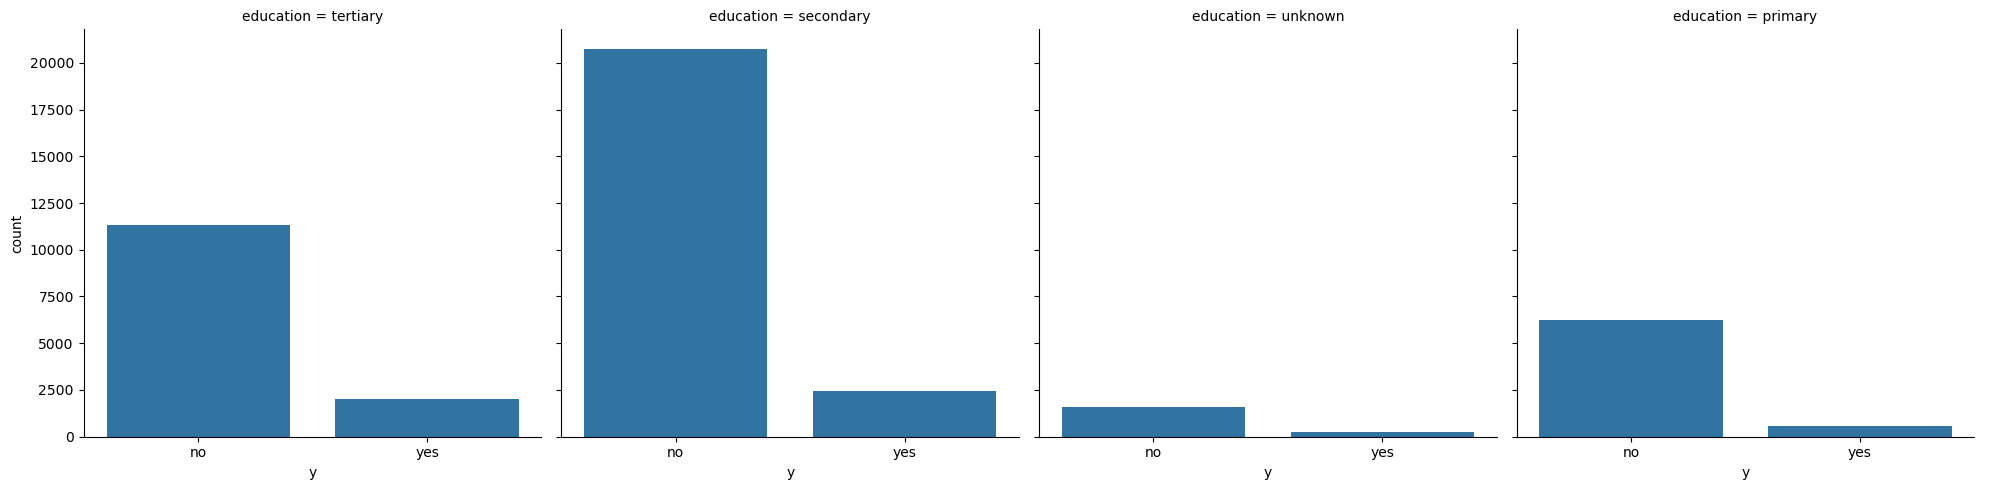

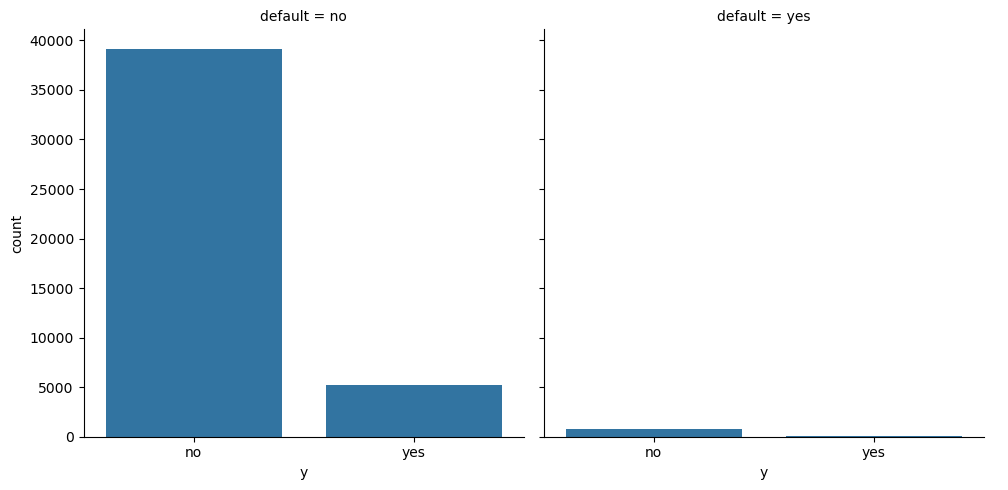

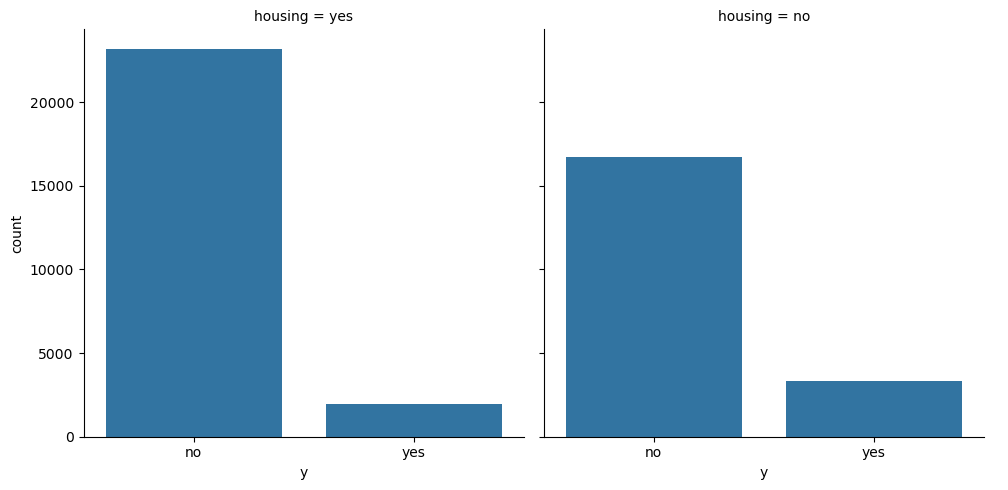

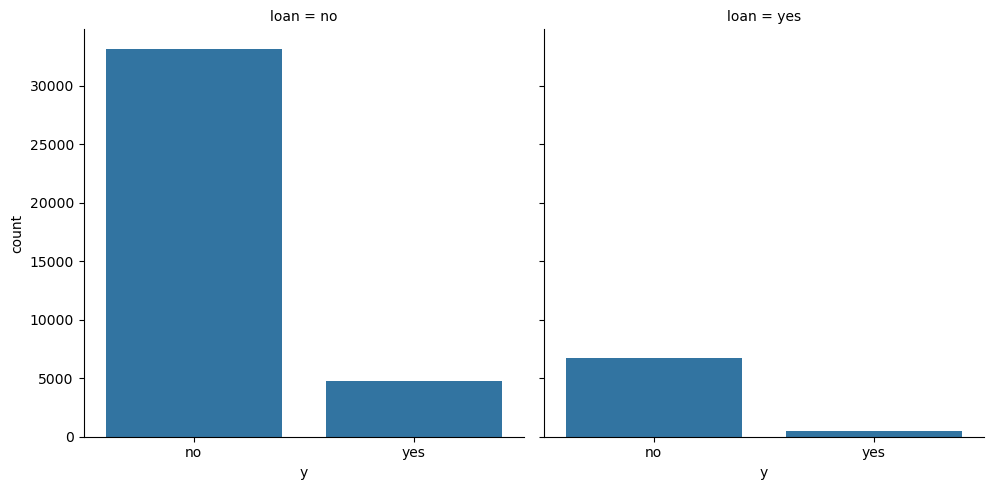

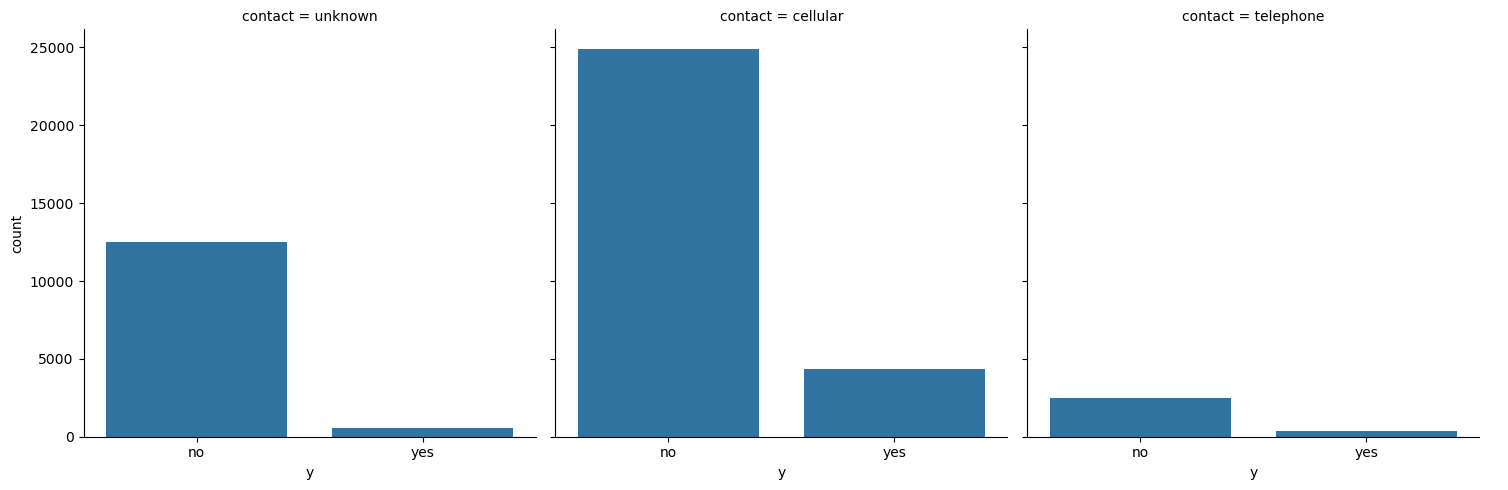

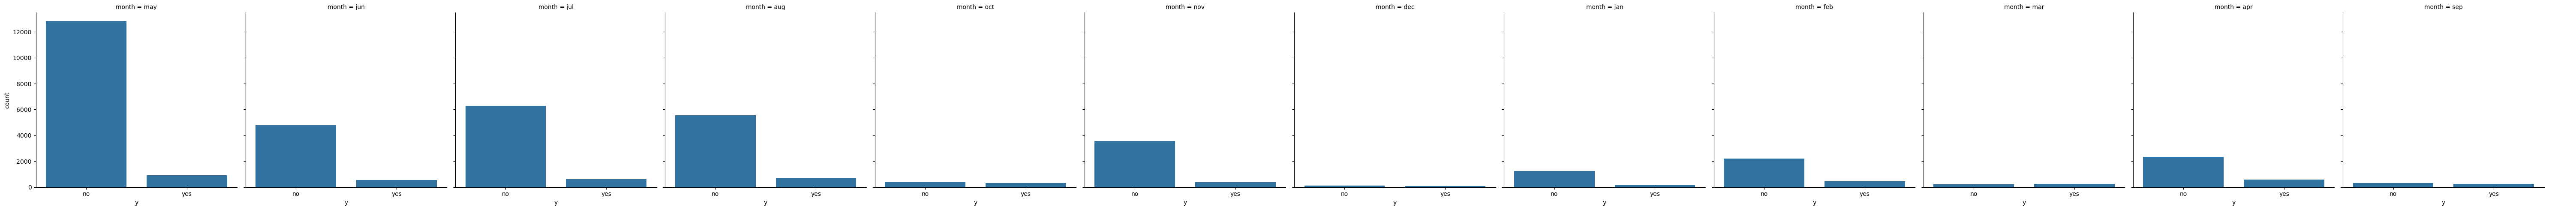

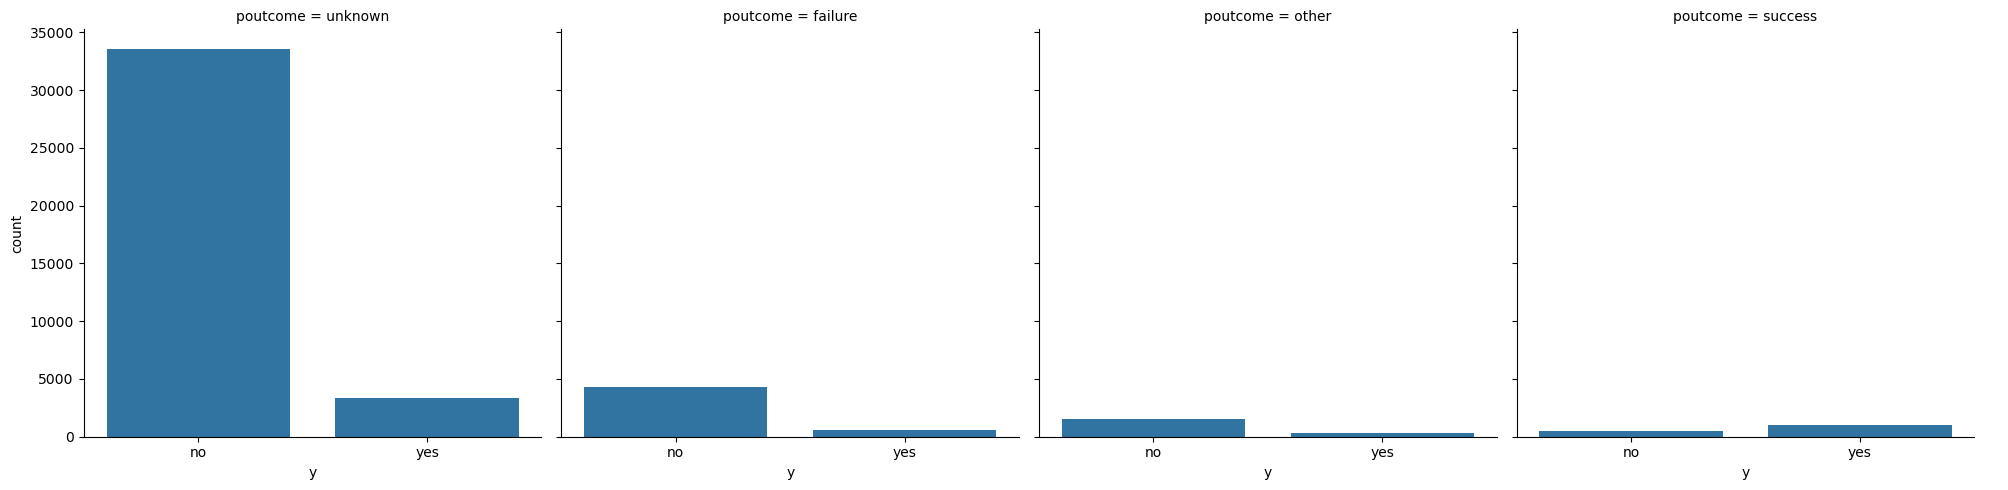

In [33]:
#check target label split over categorical features
#Find out the relationship between categorical variable and dependent variable
for categorical_feature in categorical_features:
    sns.catplot(x='y', col=categorical_feature, kind='count', data= df)
plt.show()

In [34]:
#Check target label split over categorical features and find the count
for categorical_feature in categorical_features:
    print(df.groupby(['y',categorical_feature]).size())

y    job          
no   admin.           4540
     blue-collar      9024
     entrepreneur     1364
     housemaid        1131
     management       8157
     retired          1748
     self-employed    1392
     services         3785
     student           669
     technician       6757
     unemployed       1101
     unknown           254
yes  admin.            631
     blue-collar       708
     entrepreneur      123
     housemaid         109
     management       1301
     retired           516
     self-employed     187
     services          369
     student           269
     technician        840
     unemployed        202
     unknown            34
dtype: int64
y    marital 
no   divorced     4585
     married     24459
     single      10878
yes  divorced      622
     married      2755
     single       1912
dtype: int64
y    education
no   primary       6260
     secondary    20752
     tertiary     11305
     unknown       1605
yes  primary        591
     secondary     2

### Explore the Numerical Features

In [36]:
# list of numerical variables
numerical_features = [feature for feature in df.columns if ((df[feature].dtypes != 'O') & (feature not in ['y']))]
print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df[numerical_features].head()

Number of numerical variables:  7


,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


### Find Discrete Numerical Features

In [38]:
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 0


**Take-away:**
there is no Discrete Variables in give dataset

### Relation between Discrete numerical Features and Labels
- 
NA

### Find Continous Numerical Features

In [91]:
continuous_features=[feature for feature in numerical_features if feature not in discrete_feature+['y']]
print("Continuous feature Count {}".format(len(continuous_features)))

Continuous feature Count 7


 ### Distribution of Continous Numerical Features

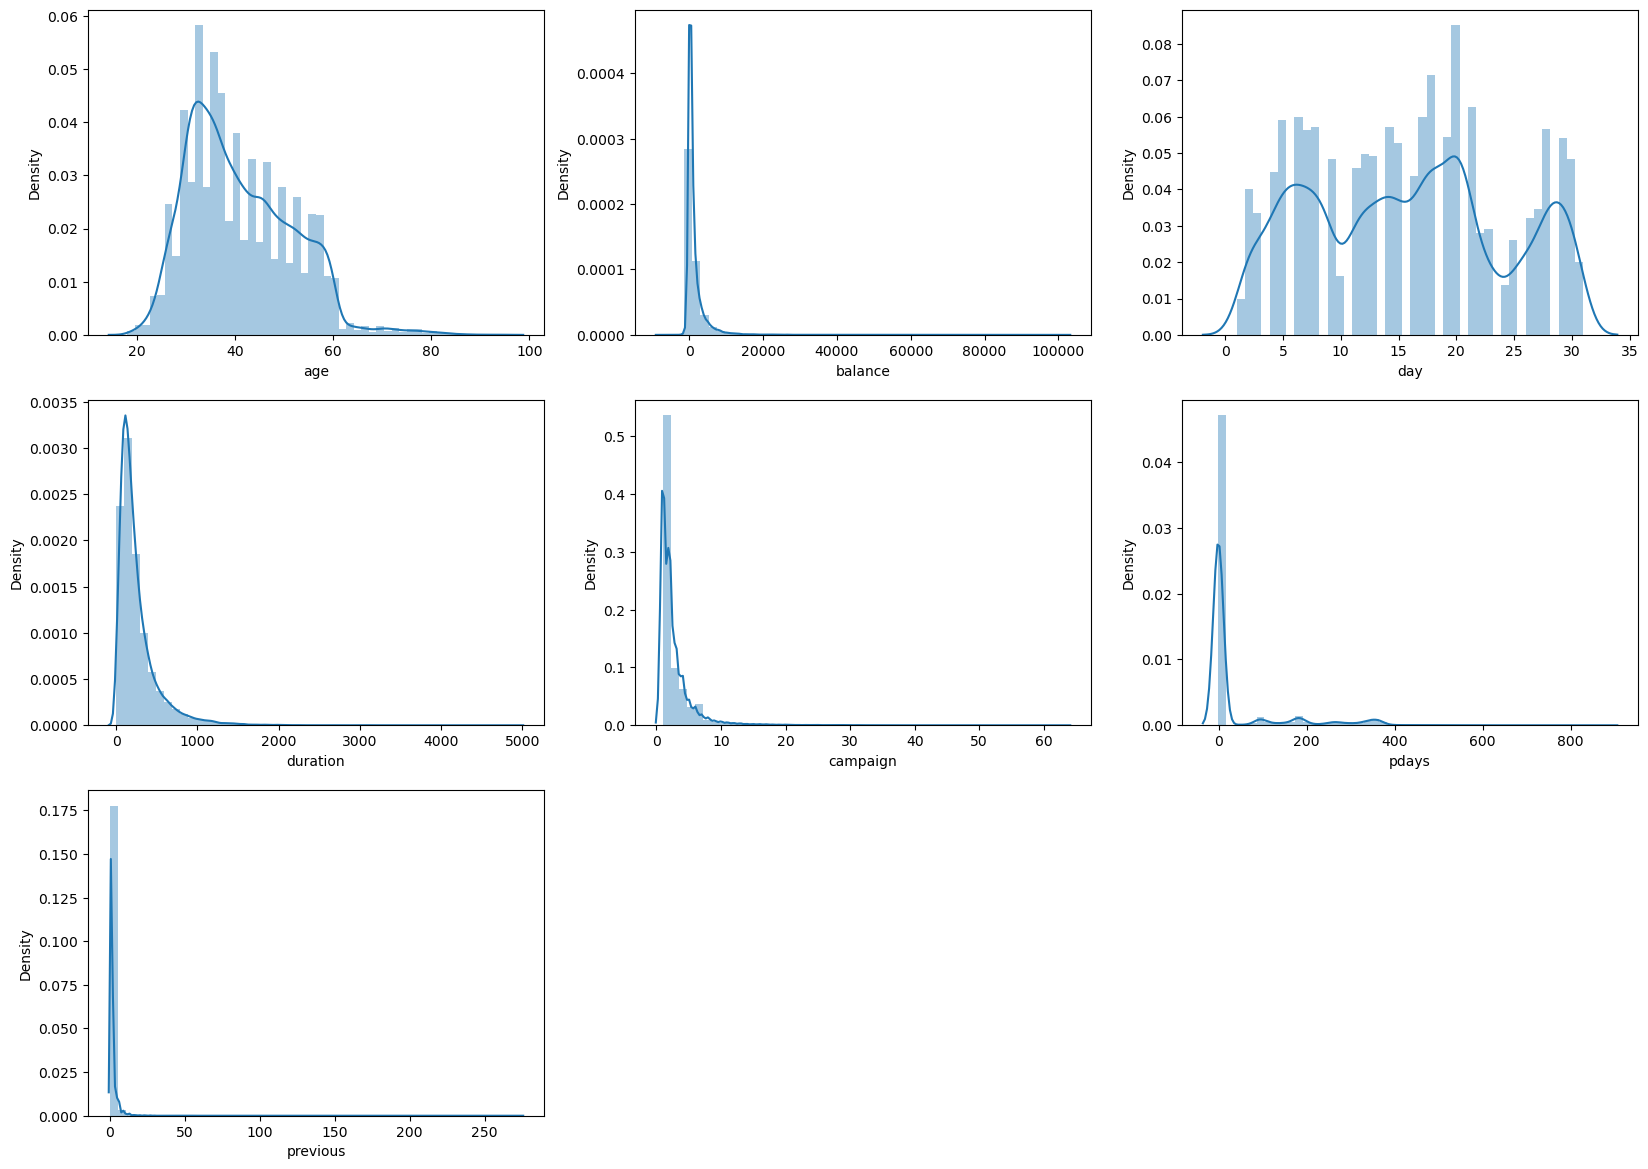

In [93]:
#plot a univariate distribution of continues observations
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for continuous_feature in continuous_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.distplot(df[continuous_feature])
    plt.xlabel(continuous_feature)
    plotnumber+=1
plt.show()

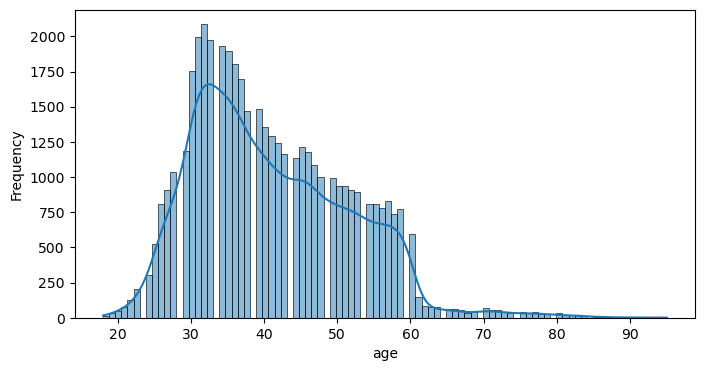

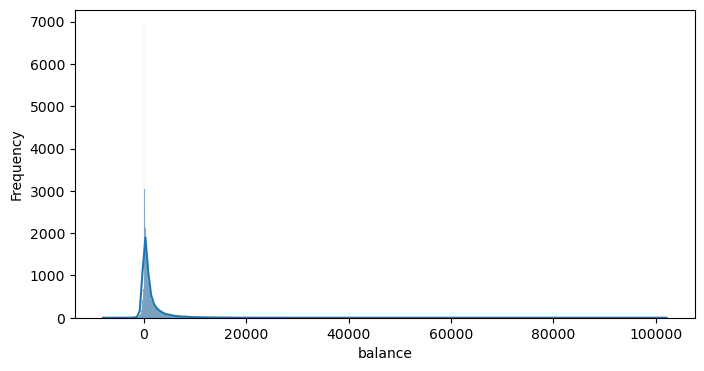

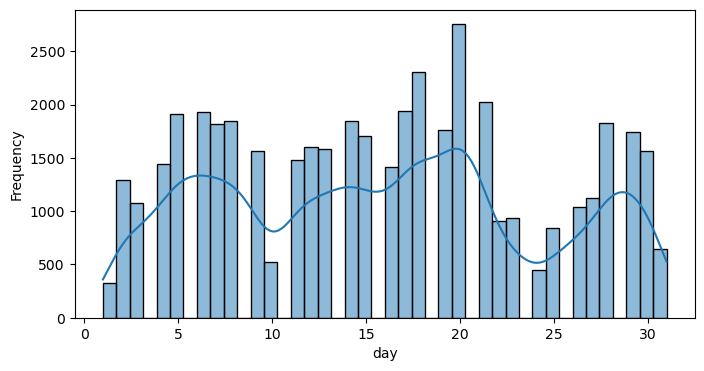

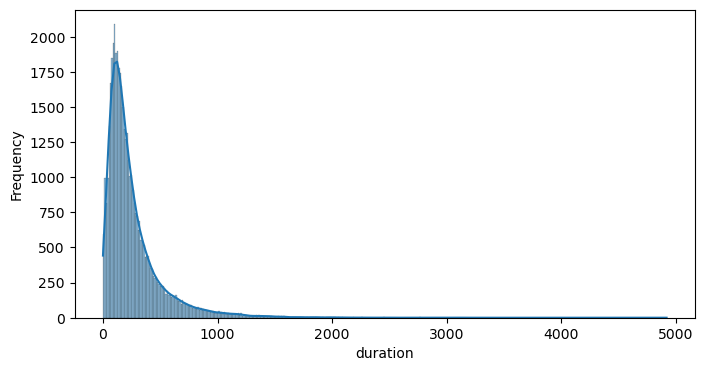

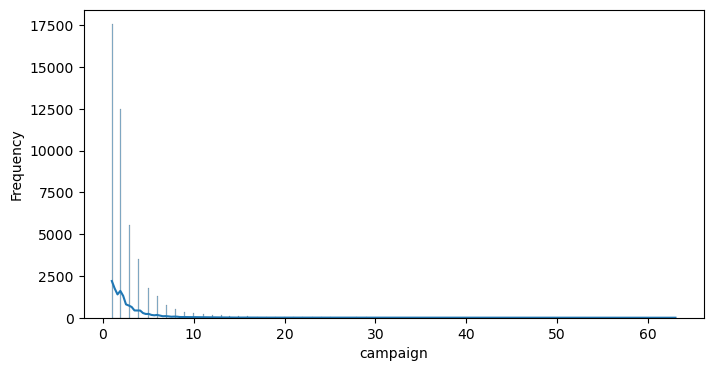

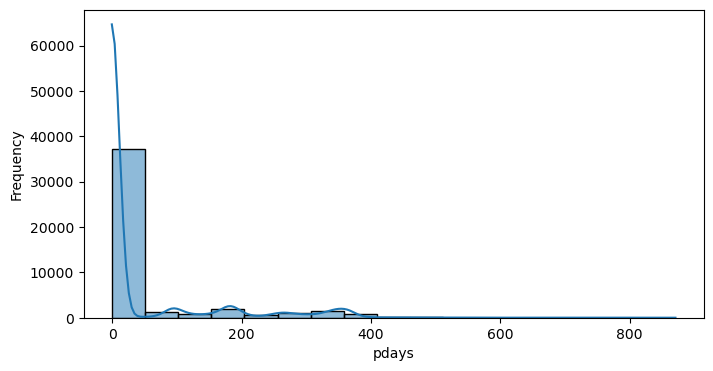

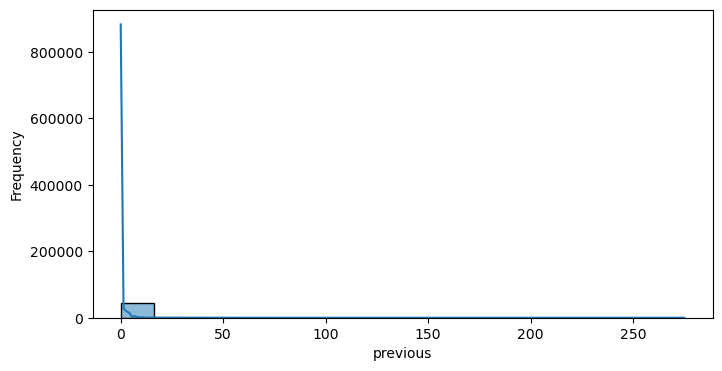

In [44]:
# Histogram distribution for numerical values "This enables us to see if there are outliers or not"

# create a function for plot distribution 
def plot_distribution(column):
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df, x=column, kde=True)
    #plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Plot distribution for each numerical column
for feature in continuous_features:
    plot_distribution(feature)


In [117]:
# Calculate skewness for numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
skewness_values = df[numerical_columns].skew()

# Display skewness values
print("Skewness of numerical columns:")
print(skewness_values)

Skewness of numerical columns:
age          0.684818
balance      8.360308
day          0.093079
duration     3.144318
campaign     4.898650
pdays        2.615715
previous    41.846454
dtype: float64


**Take-away:**

it seems age, days distributed normally

balance, duration, compaign, pdays and previous heavely skewed  and seems to be have some outliers.

### Relation between Continous numerical Features and Labels

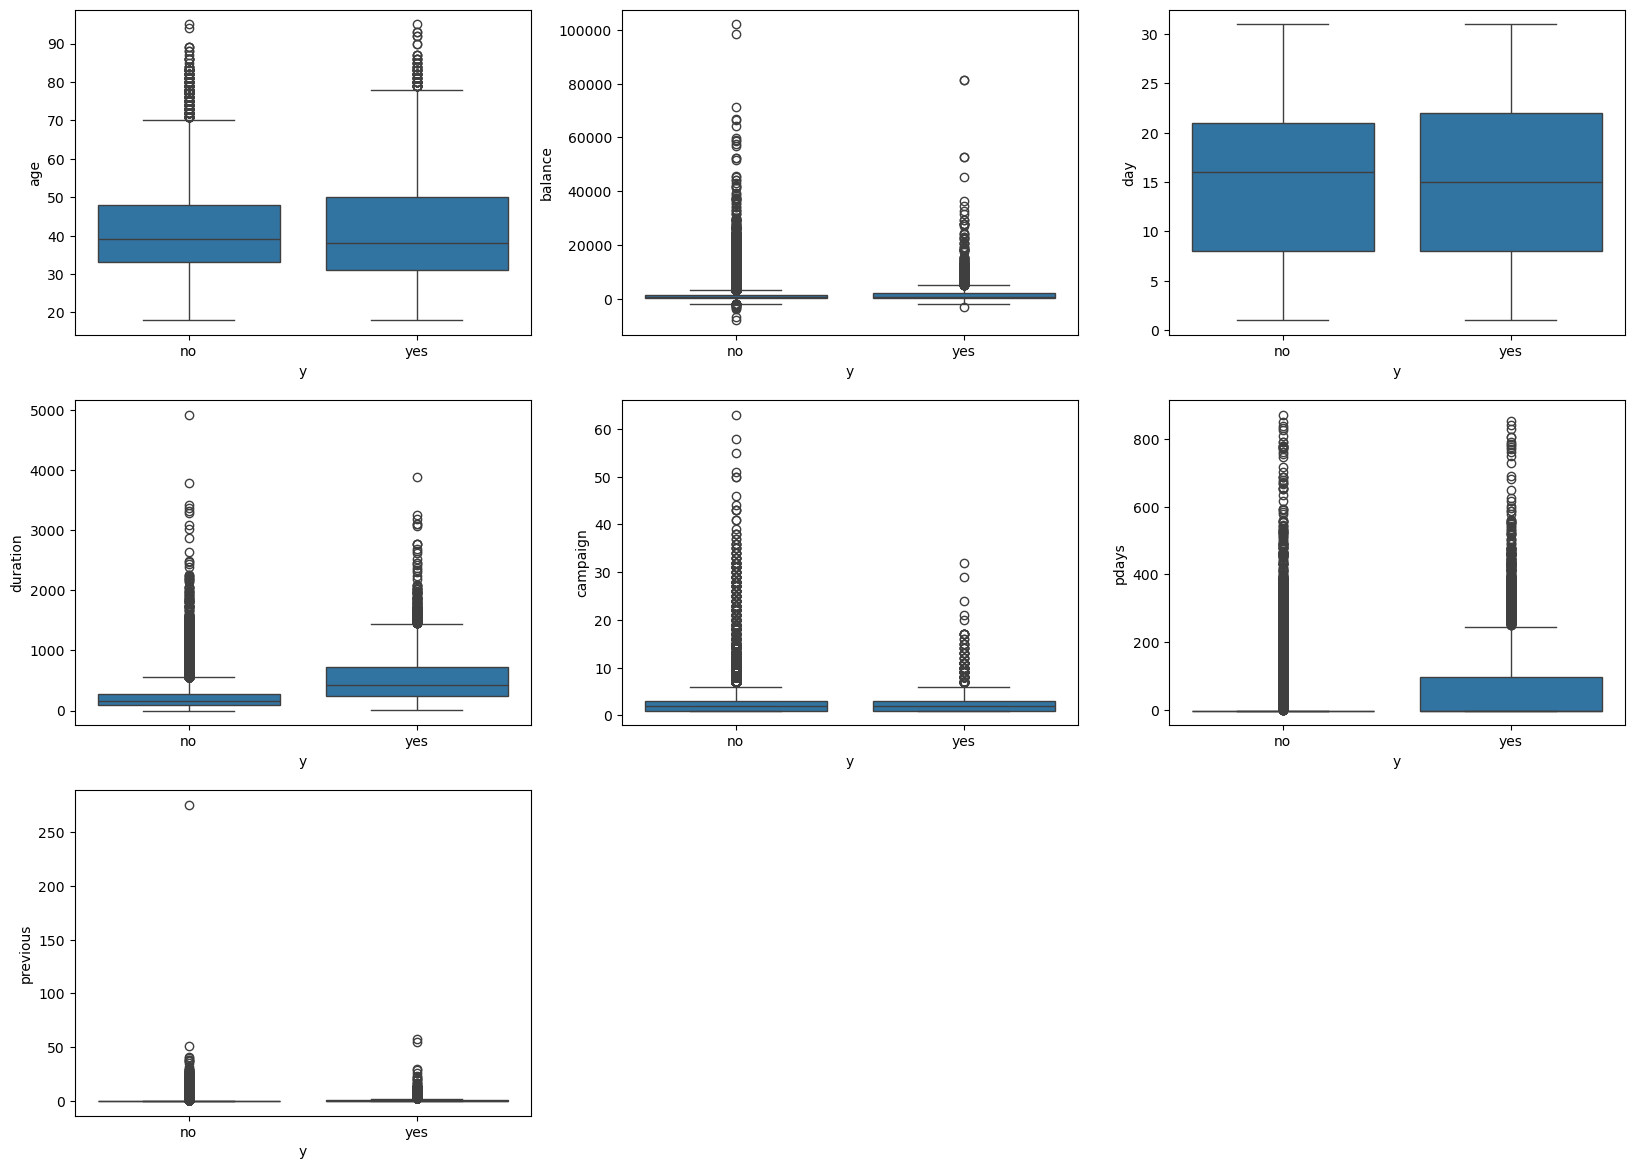

In [95]:
#boxplot to show target distribution with respect numerical features
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for feature in continuous_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(x="y", y= df[feature], data=df)
    #plt.xlabel(feature)
    plotnumber+=1
plt.show()

**Take-away:**

client shows interest on deposit who had discussion for longer duration

In [121]:
# Calculate skewness for key numerical columns
skewness_values = df[['balance', 'duration', 'campaign','pdays']].skew()
print("Skewness before correction:\n", skewness_values)


Skewness before correction:
 balance     8.360308
duration    3.144318
campaign    4.898650
pdays       2.615715
dtype: float64


In [123]:
# Apply logarithmic transformation to correct skewness
df['log_balance'] = np.sqrt(df['balance'])  # log(1 + balance) to handle zero/negative values
df['log_duration'] = np.sqrt(df['duration'])
df['log_campaign'] = np.log1p(df['campaign'])
df['log_previous']=np.log1p(df['previous'])
# Recheck skewness after transformation
new_skewness_values = df[['log_balance', 'log_duration','log_campaign','log_previous']].skew()
print("Skewness after correction:\n", new_skewness_values)


Skewness after correction:
 log_balance     1.901328
log_duration    1.173744
log_campaign    1.326222
log_previous    2.516166
dtype: float64


In [125]:
# Calculate skewness for numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
skewness_values = df[numerical_columns].skew()

# Display skewness values
print("Skewness of numerical columns:")
print(skewness_values)

Skewness of numerical columns:
age              0.684818
balance          8.360308
day              0.093079
duration         3.144318
campaign         4.898650
pdays            2.615715
previous        41.846454
log_balance      1.901328
log_duration     1.173744
log_campaign     1.326222
log_previous     2.516166
dtype: float64


Text(0.5, 1.0, 'Log-Transformed Duration Distribution')

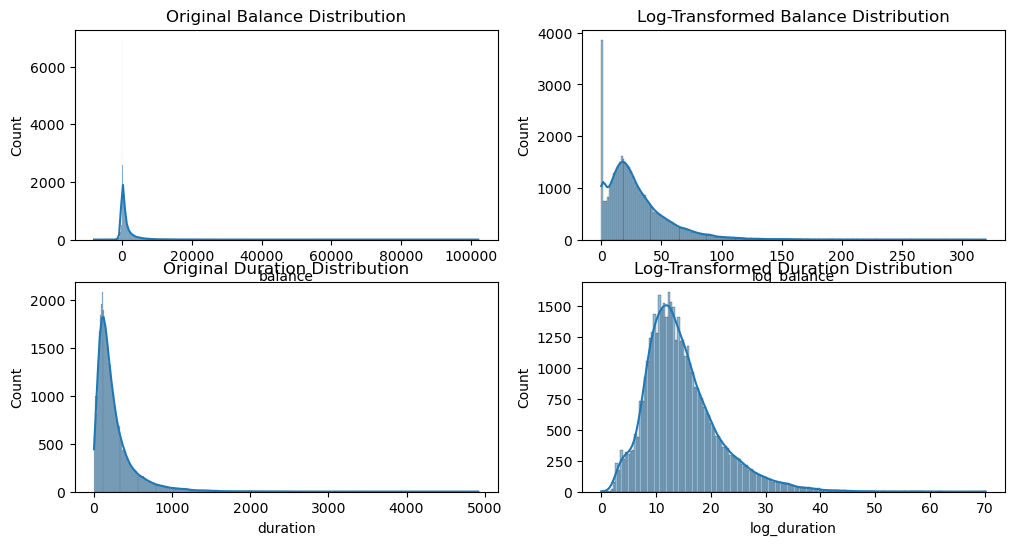

In [127]:

# Visualization to compare original and transformed data

plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
sns.histplot(df['balance'], kde=True)
plt.title('Original Balance Distribution')

plt.subplot(2, 2, 2)
sns.histplot(df['log_balance'], kde=True)
plt.title('Log-Transformed Balance Distribution')

plt.subplot(2, 2, 3)
sns.histplot(df['duration'], kde=True)
plt.title('Original Duration Distribution')

plt.subplot(2, 2, 4)
sns.histplot(df['log_duration'], kde=True)
plt.title('Log-Transformed Duration Distribution')


plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

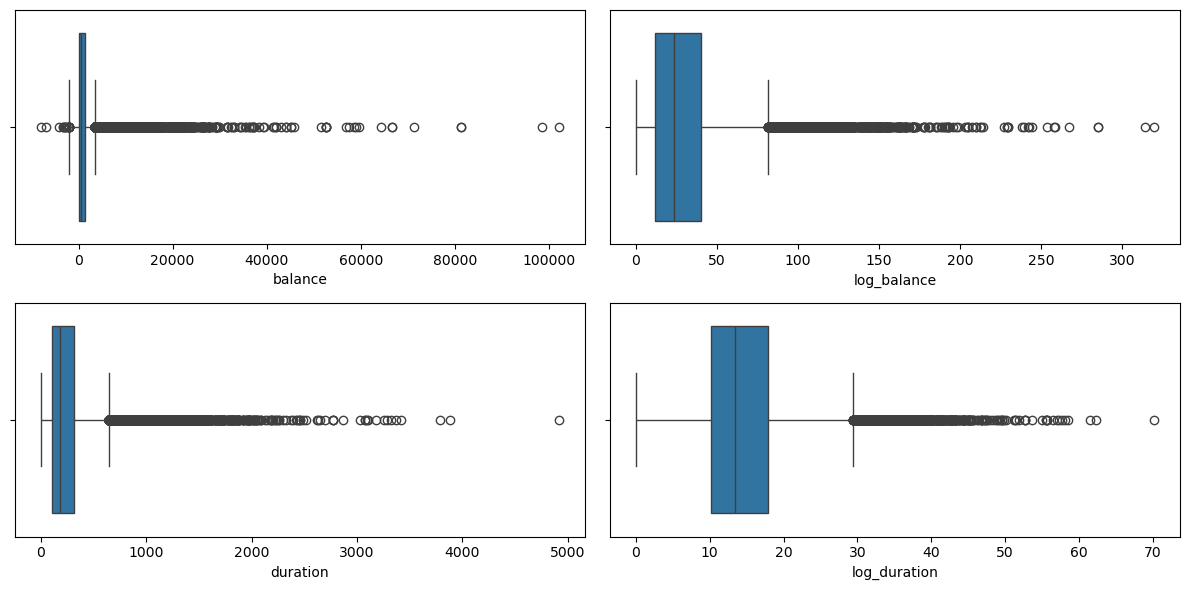

In [157]:

# Visualization to compare original and transformed data

plt.figure(figsize=(12, 6))

plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.boxplot(x=df['balance'])
plt.subplot(2, 2, 2)
sns.boxplot(x=df['log_balance'])

plt.subplot(2, 2, 3)
sns.boxplot(x=df['duration'])
plt.subplot(2, 2, 4)
sns.boxplot(x=df['log_duration'])
plt.tight_layout()
plt.show()




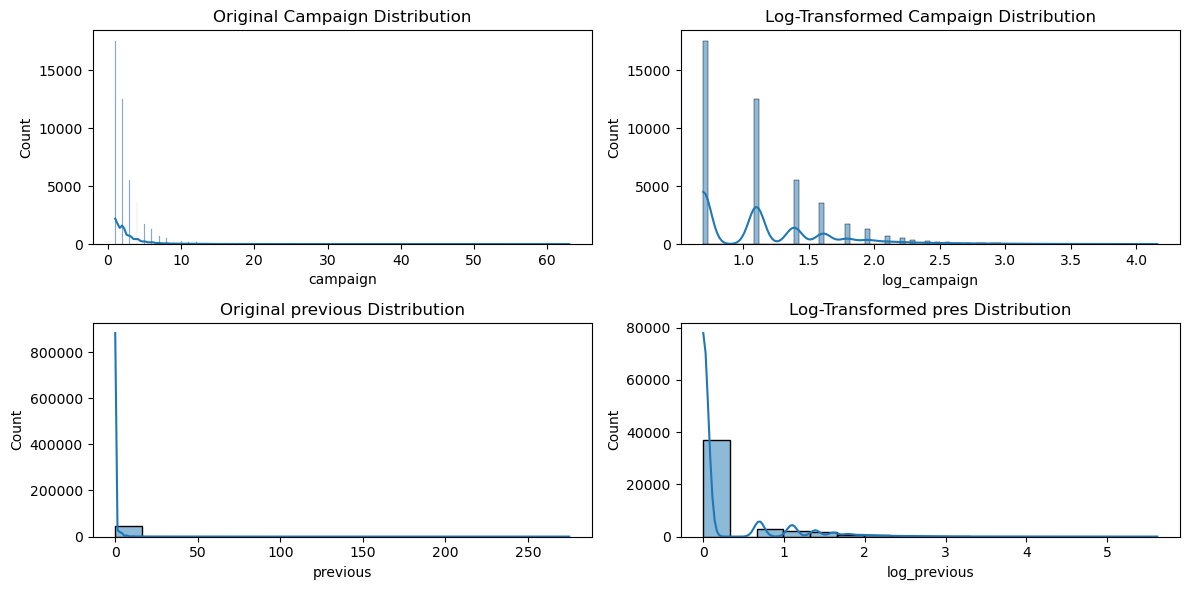

In [149]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.histplot(df['campaign'], kde=True)
plt.title('Original Campaign Distribution')

plt.subplot(2, 2, 2)
sns.histplot(df['log_campaign'], kde=True)
plt.title('Log-Transformed Campaign Distribution')

plt.subplot(2, 2, 3)
sns.histplot(df['previous'], kde=True)
plt.title('Original previous Distribution')

plt.subplot(2, 2, 4)
sns.histplot(df['log_previous'], kde=True)
plt.title('Log-Transformed ps Distribution')
plt.tight_layout()
plt.show()

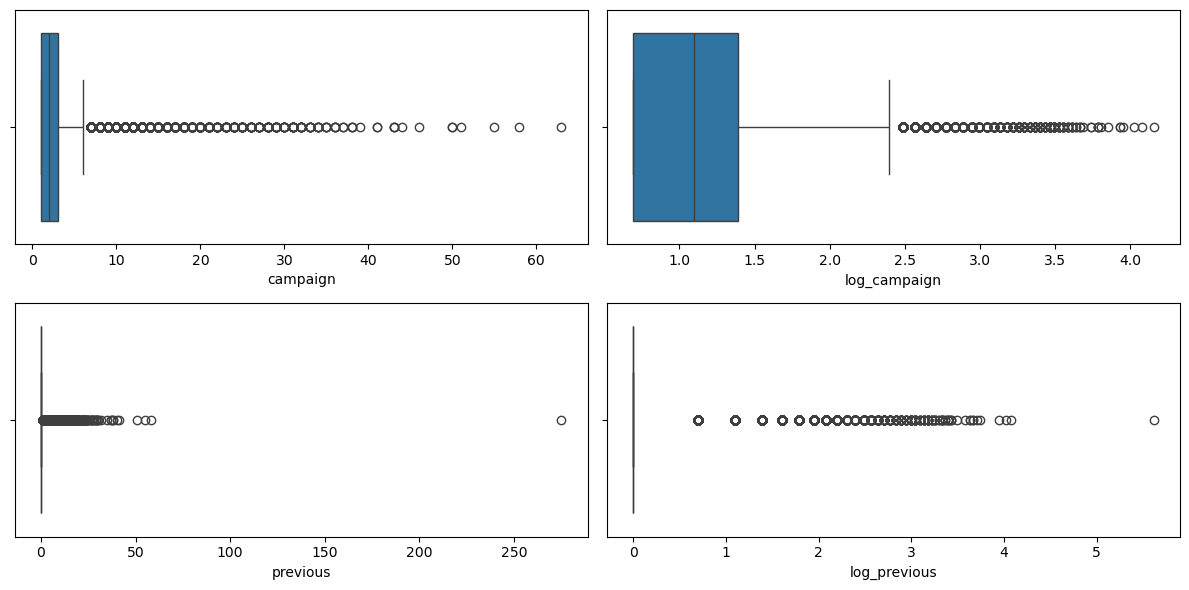

In [155]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.boxplot(x=df['campaign'])
plt.subplot(2, 2, 2)
sns.boxplot(x=df['log_campaign'])

plt.subplot(2, 2, 3)
sns.boxplot(x=df['previous'])
plt.subplot(2, 2, 4)
sns.boxplot(x=df['log_previous'])
plt.tight_layout()
plt.show()

In [159]:
df1=df
df1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,duration,campaign,pdays,previous,poutcome,y,log_balance,log_duration,log_campaign,log_previous
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,261,1,-1,0,unknown,no,46.292548,16.155494,0.693147,0.0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,151,1,-1,0,unknown,no,5.385165,12.288206,0.693147,0.0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,76,1,-1,0,unknown,no,1.414214,8.717798,0.693147,0.0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,92,1,-1,0,unknown,no,38.807216,9.591663,0.693147,0.0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,198,1,-1,0,unknown,no,1.000000,14.071247,0.693147,0.0


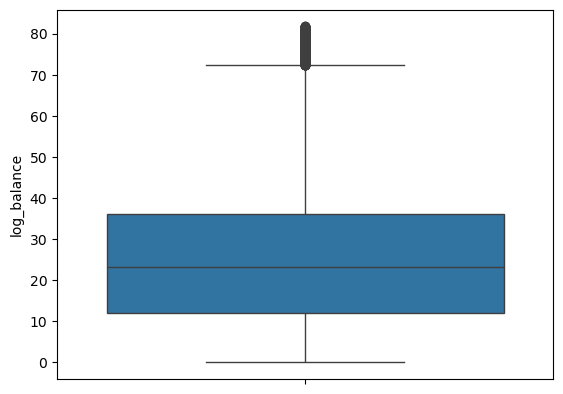

0.7363254545521004

In [163]:
q1=df1['log_balance'].quantile(0.25)
q3=df1['log_balance'].quantile(0.75)
iqr=q3-q1
lower=q1-1.5*iqr
upper=q3+1.5*iqr
outliers= (df1['log_balance']<lower)| (df1['log_balance']>upper)
mi=df1['log_balance'].mean()
df1.loc[outliers,'log_balance']=mi

sns.boxplot(data=df1['log_balance'])
plt.show()
df1['log_balance'].skew()

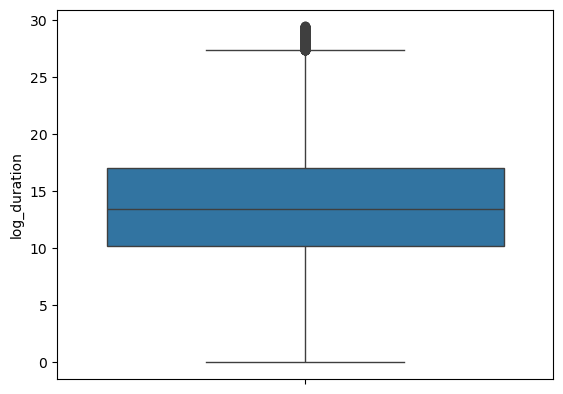

0.4955070417410832

In [165]:
q1=df1['log_duration'].quantile(0.25)
q3=df1['log_duration'].quantile(0.75)
iqr=q3-q1
lower=q1-1.5*iqr
upper=q3+1.5*iqr
outliers= (df1['log_duration']<lower)| (df1['log_duration']>upper)
mi=df1['log_duration'].mean()
df1.loc[outliers,'log_duration']=mi

sns.boxplot(data=df1['log_duration'])
plt.show()
df1['log_duration'].skew()

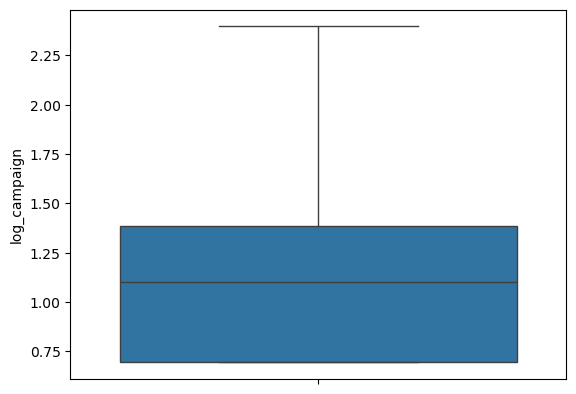

0.8346892639094128

In [167]:
q1=df1['log_campaign'].quantile(0.25)
q3=df1['log_campaign'].quantile(0.75)
iqr=q3-q1
lower=q1-1.5*iqr
upper=q3+1.5*iqr
outliers= (df1['log_campaign']<lower)| (df1['log_campaign']>upper)
mi=df1['log_campaign'].mean()
df1.loc[outliers,'log_campaign']=mi

sns.boxplot(data=df1['log_campaign'])
plt.show()
df1['log_campaign'].skew()

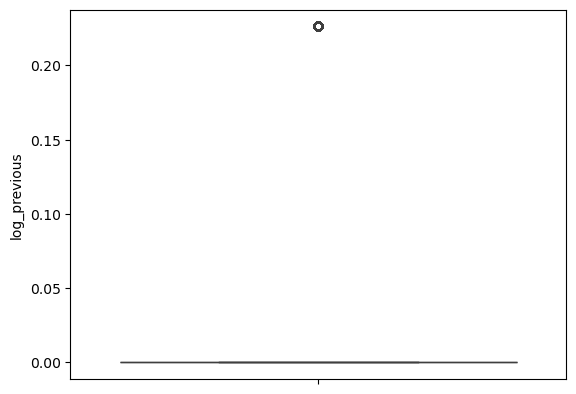

1.642892085666409

In [169]:
q1=df1['log_previous'].quantile(0.25)
q3=df1['log_previous'].quantile(0.75)
iqr=q3-q1
lower=q1-1.5*iqr
upper=q3+1.5*iqr
outliers= (df1['log_previous']<lower)| (df1['log_previous']>upper)
mi=df1['log_previous'].mean()
df1.loc[outliers,'log_previous']=mi

sns.boxplot(data=df1['log_previous'])
plt.show()
df1['log_previous'].skew()

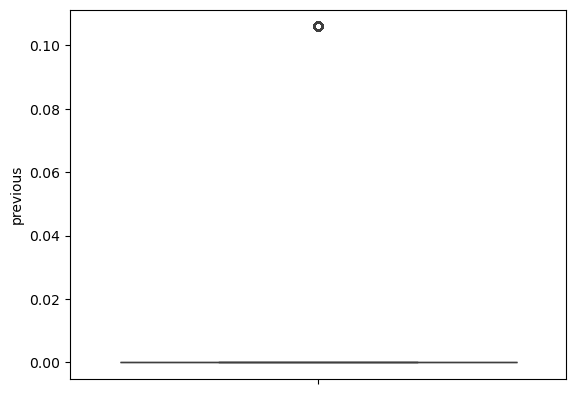

1.642892085666409

In [183]:
q1=df1['previous'].quantile(0.25)
q3=df1['previous'].quantile(0.75)
iqr=q3-q1
lower=q1-1.5*iqr
upper=q3+1.5*iqr
outliers= (df1['previous']<lower)| (df1['log_previous']>upper)
mi=df1['previous'].mean()
df1.loc[outliers,'previous']=mi

sns.boxplot(data=df1['previous'])
plt.show()
df1['previous'].skew()

In [179]:
zdf = df.copy() # make a df copy to make outlier capped df with z score methode
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_columns:               # loop through every column in zdf
    z_score = zscore(zdf[col])         # calculate the Z-score for the column
    outlier_mask = np.abs(z_score) > 3 # make mask of outliers
    upper_bound = zdf[col][~outlier_mask].max() # invert the mask and get the max of non outlier value
    lower_bound = zdf[col][~outlier_mask].min() # invert the mask and get the min of non outlier value
    zdf[col] = np.where(z_score > 3, upper_bound, np.where(z_score < -3, lower_bound, zdf[col]))

0.5551956661132058
2.6341087349453547
0.09307901402122411
1.7638681805897323
2.2718622314242363
2.2865466497025158
1.6428920856664104
0.7363254545521004
0.4955070417410832
0.8346892639094128
1.642892085666409


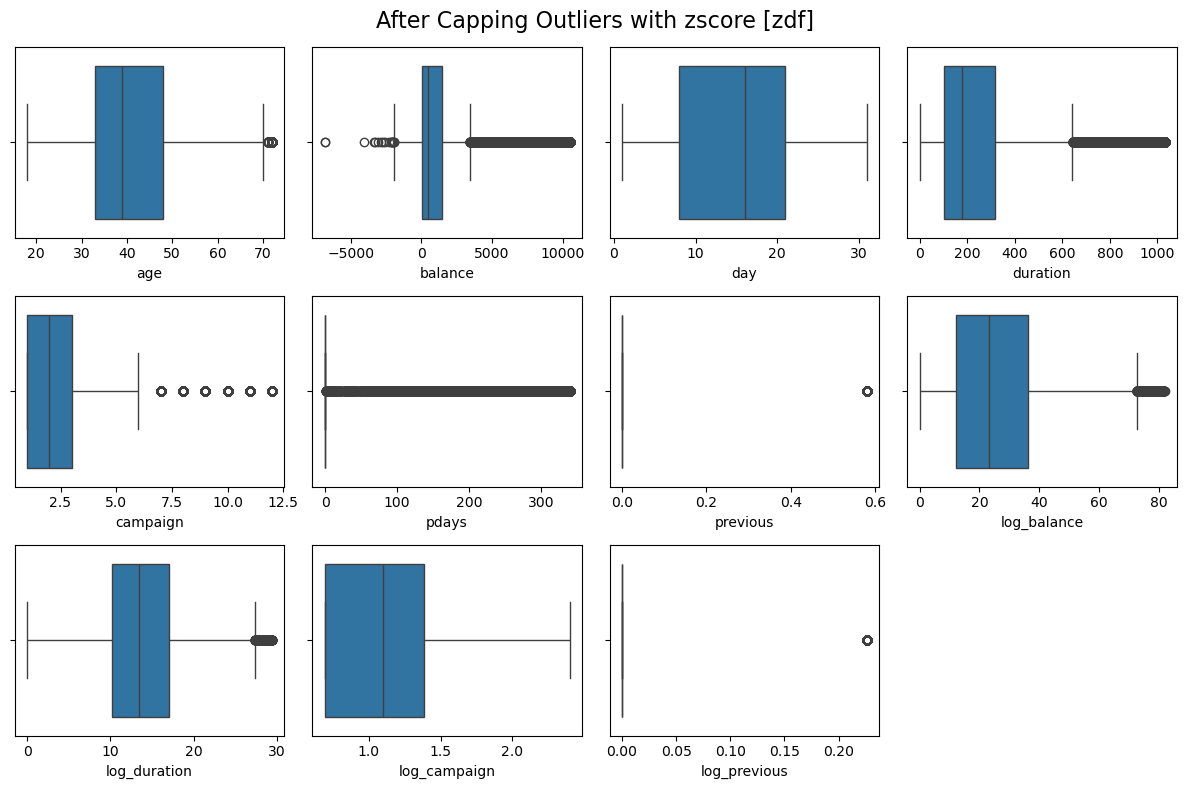

In [189]:
# check outliers after capping with z score

index = 0
plt.figure(figsize=(12,8))
plt.suptitle("After Capping Outliers with zscore [zdf]", fontsize = 16)
for col in ['age','day','pdays''log_balance','log_duration','log_campaign','log_previous':
    index+=1
    plt.subplot(3,4,index)
    sns.boxplot(x=zdf[col])
    print(zdf[col].skew())
plt.tight_layout()
plt.show()

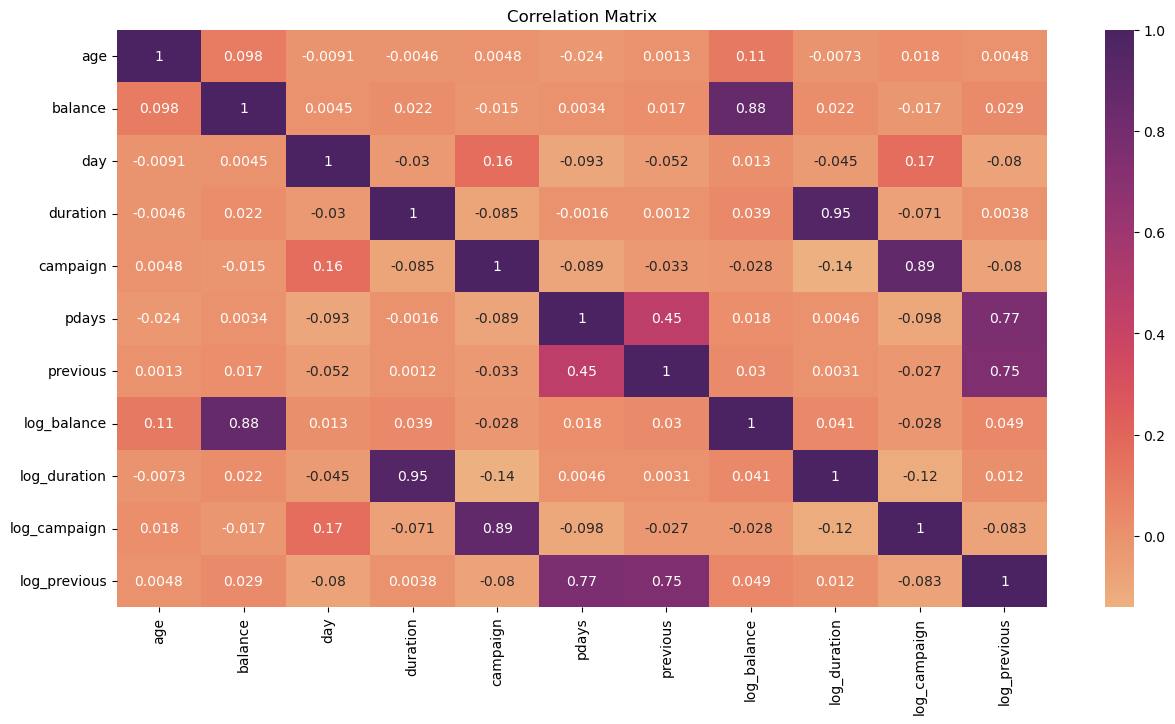

In [141]:
# Correlation matrix using heatmap
# Calculates the correlation coefficients between all pairs of numerical variables in the dataset
correlation_matrix = df.corr(numeric_only=True)

# Create a heatmap figure with specified size (in inches)
plt.figure(figsize=(15, 7.5))

# Generate a heatmap to visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='flare') # annot: write the data value in each cell

# Add a title to the plot
plt.title('Correlation Matrix')

# Display the heatmap
plt.show()